<a href="https://colab.research.google.com/github/johanv26/analisis_numerico/blob/master/Steepest_descent_example9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example 9 
Find the minimizer of $f (x)=0.06e^{(2x_1^2+x_2^2)} +0.05e^{x_1-2x_2}+e^{-x_1} $

Programacion de los metodos

In [ ]:
import numpy as np
from scipy import optimize

In [ ]:
def f(x_1,x_2):
  return 0.06*np.exp(2*x_1+x_2) +0.05*np.exp(x_1-2*x_2)+np.exp(-x_1)

In [ ]:
def grad_f(x_1,x_2):
  return np.array([0.12*np.exp(2*x_1+x_2)+0.05*np.exp(x_1-2*x_2)-np.exp(-x_1)
  ,0.06*np.exp(2*x_1+x_2)-0.1*np.exp(x_1-2*x_2)])

In [ ]:
def descent_grad_optim_step(x, f, grad, a, max_iter): #Gradiente desendiente paso optimizado
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
    g = grad(x[0],x[1])
    def phi(s):
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10)

    x = x - a * g
    xs[i+1,:] = x

    tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
    if tol < epsi:
      break
  return xs,i+1

In [ ]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter):
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x
      tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if tol < epsi:
        break
  return xs,i+1

In [ ]:
import matplotlib.pyplot as plt
x = np.array([-0.5,2])
epsi = 0.001;
max_iter = 10


In [ ]:
res1 = descent_grad_optim_step(x, f, grad_f,epsi,max_iter)
xs1 = res1[0]
i1 = res1[1]

0.6458865589505005 -0.028235701489804782


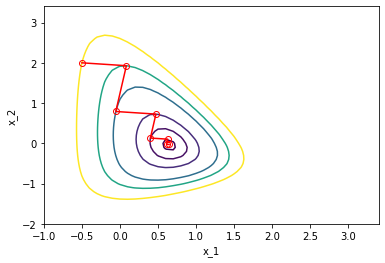

In [ ]:
#xx = np.linspace(-1, 1.75, 256)
#yy = np.linspace(-2, 3.5, 256)
delta=0.1
yy=np.arange(-2,3.5,delta)
xx=np.arange(-1,3.5,delta)
X,Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X+Y) + 0.05*np.exp(X-2*Y)+np.exp(-X)
function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y,Z,np.flip(function_value))#Has to be increaser by contour
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1],'-ro',fillstyle='none')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs1[i1,0],xs1[i1,1])

Text(0, 0.5, 'f(x)')

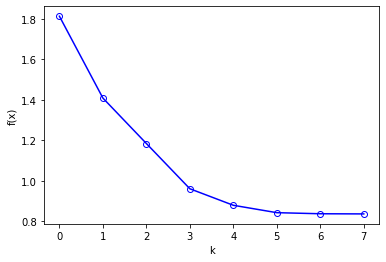

In [ ]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo',fillstyle='none')
plt.xlabel('k')
plt.ylabel('f(x)')

In [ ]:
function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
np.flip(function_value)

In [ ]:
x = np.array([-0.5,2])
epsi = 0.001;
max_iter = 1000
a=0.25

In [ ]:
res2 = descent_grad_fixed_step(x, grad_f, a, max_iter,epsi)
xs2 = res2[0]
i2 = res2[1]

0.6205695430639326 0.0575397824479296


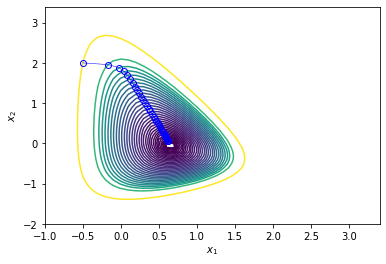

In [ ]:
delta=0.1
xx=np.arange(-1,3.5,delta)
yy=np.arange(-2,3.5,delta)
X,Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X+Y) + 0.05*np.exp(X-2*Y)+np.exp(-X)
function_value=f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y,Z,np.flip(function_value))#Has to be increaser by contour
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1],'-bo',fillstyle='none')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs2[i2,0],xs2[i2,1])

In [ ]:
from matplotlib.lines import Line2D
Line2D.fillStyles

('full', 'left', 'right', 'bottom', 'top', 'none')

Text(0, 0.5, 'f(x)')

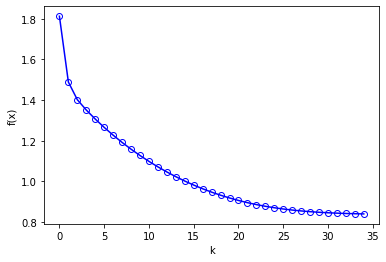

In [ ]:
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo',fillstyle='none')
plt.xlabel('k')
plt.ylabel('f(x)')